<a href="https://colab.research.google.com/github/Maurya1202/Maurya1202/blob/main/digital_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1.png to 1.png


Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3190 - sparse_categorical_accuracy: 0.9106
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9620
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9746
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9811
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9779
Test Accuracy: 0.9779000282287598
Test Loss: 0.07289987802505493


Saving p.png to p (1).png
1/1 [==============================] - 0s 74ms/step


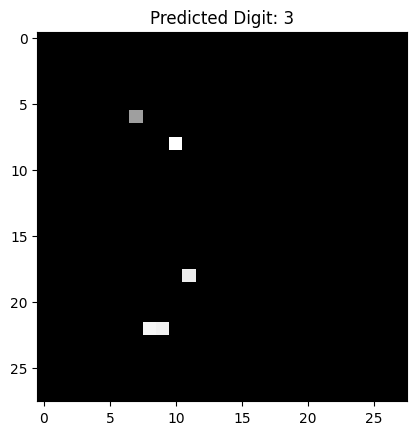

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from google.colab import files

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

# Compile the model with SparseCategoricalAccuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

# Load and process the uploaded image
uploaded = files.upload()
for filename in uploaded.keys():
    img_content = uploaded[filename]
    img = cv.imdecode(np.frombuffer(img_content, np.uint8), cv.IMREAD_GRAYSCALE)

    # Resize the image to (28, 28)
    img = cv.resize(img, (28, 28))

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Reshape the image for the model
    img = np.expand_dims(img, axis=0)

    # Predict the digit in the image
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    # Display the result
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()
